# aSPEM Experiment : analysis




In [1]:
%run 0_parameters.ipynb


WELCOME

2019-07-22T16:46:49+02:00

CPython 3.7.4
IPython 7.6.1

numpy 1.16.4
matplotlib 3.1.1
torch 1.1.0.post2

compiler   : Clang 10.0.1 (clang-1001.0.46.4)
system     : Darwin
release    : 18.6.0
machine    : x86_64
processor  : i386
CPU cores  : 36
interpreter: 64bit
host name  : fortytwo
Git hash   : 842fc32ad3603498d1aec8cfbaf3b3a2cf3b11c4
Git repo   : https://github.com/chloepasturel/AnticipatorySPEM
Git branch : master


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


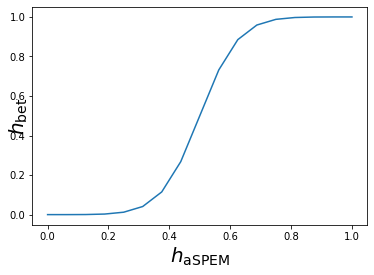

In [2]:
p = np.linspace(0, 1, 17)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def logit(p):
    return np.log(p / (1 - p))
    
fig, ax = plt.subplots()

ax.set_xlabel(r'$h_{\mathrm{aSPEM}}$', fontsize=20) ; 
ax.set_ylabel(r'$h_{\mathrm{bet}}$', labelpad=-20, fontsize=20)
    
ax.plot(p, sigmoid(4.*logit(p)))

In [17]:
if not os.path.exists('figures/Result'):
    os.makedirs('figures/Result')

In [4]:
msfigpath = '../PasturelMontagniniPerrinet2019/figures'
observer = None #'AM'
mode = 'pari'

from aSPEM import Analysis
e = Analysis(observer=observer, mode=mode, name_file_fit='fct_velocity_sigmo')

In [5]:
t_titre_f = t_titre
t_label_f = t_label
fig_width_f = fig_width/2

proba = 'true', 'bcp'

mode_bcp = 'fixed', 'max', 'expectation', 'mean', 'leaky'

result = 'bet', 'acceleration', 'velocity'


color_bcp_mean = 'g'
color_bcp_fix = 'tab:orange'
color_true_p = 'b'

In [6]:
opt = dict(t_titre=t_titre_f, t_label=t_label_f, titre='',
           color_r=[color_true_p, color_bcp_fix, color_bcp_mean], alpha=1)

real :
mean r : 0.6949282558089741 +/- 0.08616601718854237
mean MI : 0.9400985946400798 +/- 0.2550573589801995

leaky :
mean r : 0.7311944085629235 +/- 0.12986083560876127
mean MI : 1.1178437166011033 +/- 0.40929175360168124

mean :
mean r : 0.8134820212318102 +/- 0.09165037920053383
mean MI : 1.3126921676470396 +/- 0.36441827882578837

real leaky
r = WilcoxonResult(statistic=18.0, pvalue=0.09948088075636449)
mi = WilcoxonResult(statistic=12.0, pvalue=0.034170472692229406) 

real mean
r = WilcoxonResult(statistic=0.0, pvalue=0.002217721464237049)
mi = WilcoxonResult(statistic=0.0, pvalue=0.002217721464237049) 

leaky mean
r = WilcoxonResult(statistic=5.0, pvalue=0.00764908205529392)
mi = WilcoxonResult(statistic=11.0, pvalue=0.0280561241492436) 



/Users/laurentperrinet/pool/AME_is_AnalyseModelisationExperimentation_Chloe/AnticipatorySPEM/aSPEM.py:2367: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


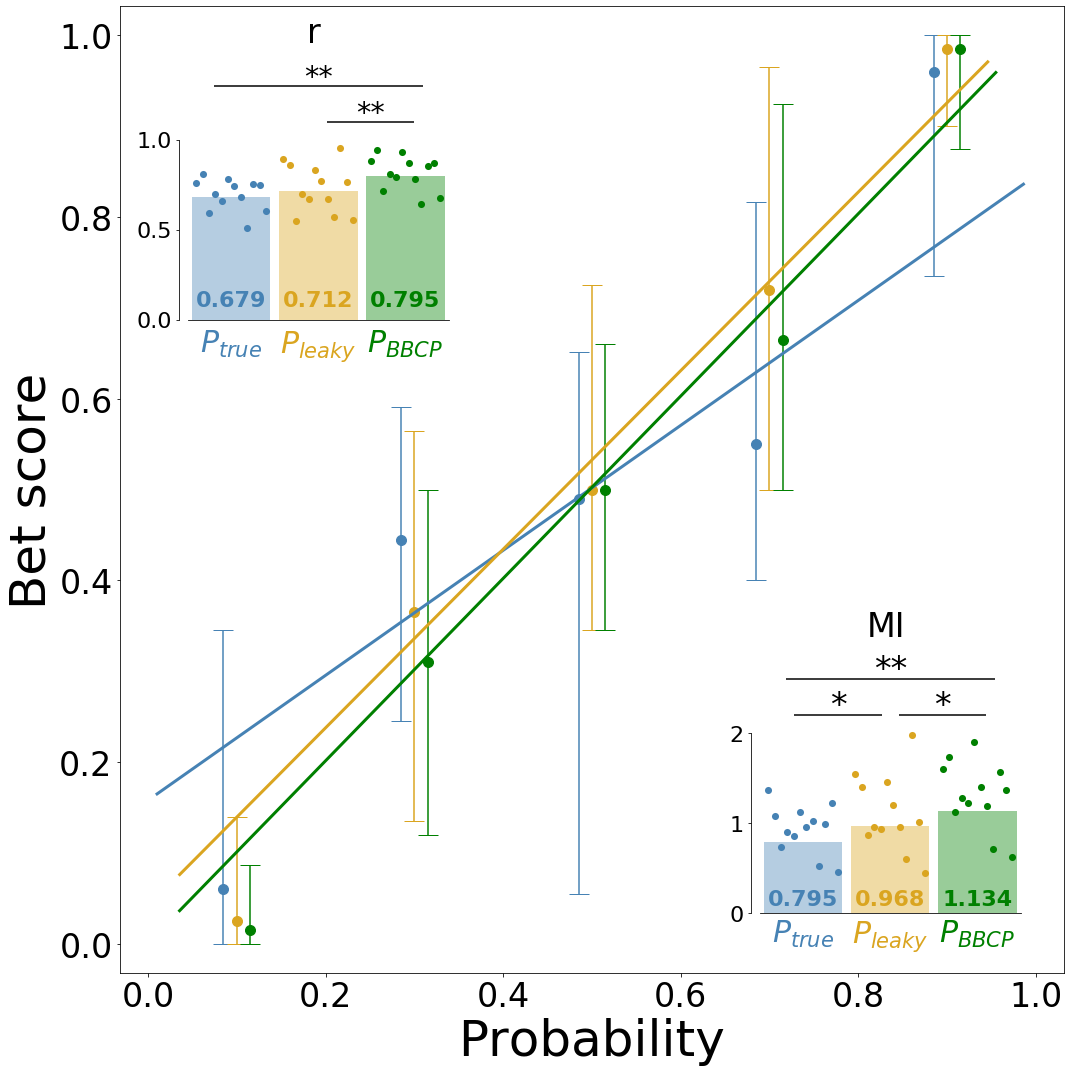

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(fig_width_f, fig_width_f))#,constrained_layout=True)
axs = e.comparison_line(ax=axs, fig=fig, result='bet', offset=0.015, lw_r=3,   **opt)
for ext in exts: fig.savefig('{msfigpath}/4_B_result_psycho_bet'.format(msfigpath=msfigpath) + ext, dpi=dpi)

real :
mean r : 0.6138094371436248 +/- 0.06988338061265736
mean MI : 0.5622221741547854 +/- 0.10792628505105299

leaky :
mean r : 0.6005091596270464 +/- 0.0790586515682174
mean MI : 0.6221265879376084 +/- 0.10254728341683389

mean :
mean r : 0.6734378813597086 +/- 0.07975726457431775
mean MI : 0.7079482646555189 +/- 0.13419759067142

real leaky
r = WilcoxonResult(statistic=24.0, pvalue=0.23931654122149526)
mi = WilcoxonResult(statistic=5.0, pvalue=0.00764908205529392) 

real mean
r = WilcoxonResult(statistic=0.0, pvalue=0.002217721464237049)
mi = WilcoxonResult(statistic=0.0, pvalue=0.002217721464237049) 

leaky mean
r = WilcoxonResult(statistic=2.0, pvalue=0.0037017494066892425)
mi = WilcoxonResult(statistic=3.0, pvalue=0.004741768038406972) 



/Users/laurentperrinet/pool/AME_is_AnalyseModelisationExperimentation_Chloe/AnticipatorySPEM/aSPEM.py:2367: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


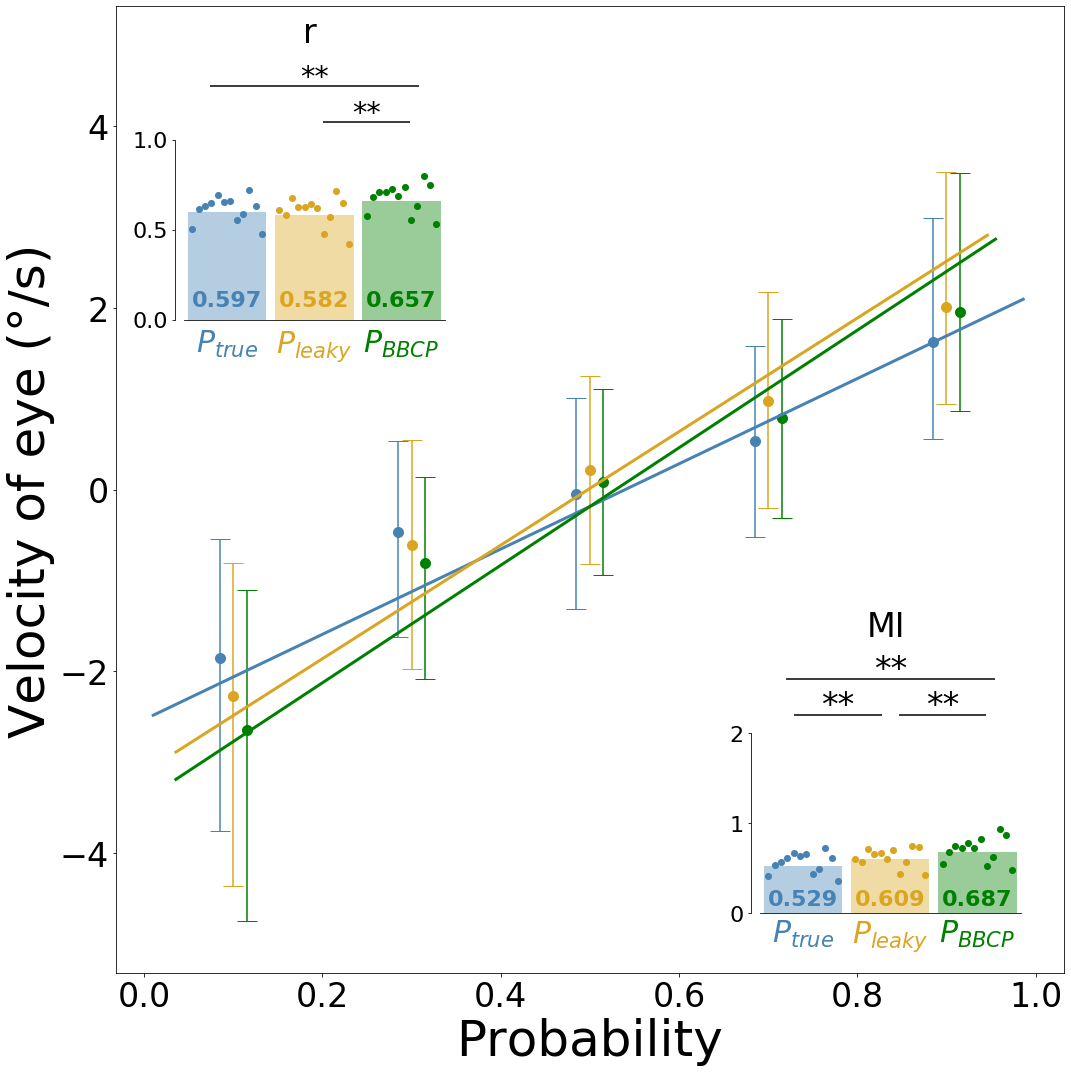

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(fig_width_f, fig_width_f))#,constrained_layout=True)
axs = e.comparison_line(ax=axs, fig=fig, result='velocity', offset=0.015, lw_r=3, **opt)
for ext in exts: fig.savefig('{msfigpath}/4_A_result_psycho_aSPEM'.format(msfigpath=msfigpath) + ext, dpi=dpi)

### without pause

real :
mean r : 0.6949282558089741 +/- 0.08616601718854237
mean MI : 0.9400985946400798 +/- 0.2550573589801995

leaky :
mean r : 0.6413150028635134 +/- 0.12095691823100473
mean MI : 0.9666170423792467 +/- 0.3008160820517698

mean :
mean r : 0.8027032298560711 +/- 0.09055325199794388
mean MI : 1.2557933725955661 +/- 0.34983736788271114

real leaky
r = WilcoxonResult(statistic=14.0, pvalue=0.04986020375690694)
mi = WilcoxonResult(statistic=30.0, pvalue=0.480176889906077) 

real mean
r = WilcoxonResult(statistic=0.0, pvalue=0.002217721464237049)
mi = WilcoxonResult(statistic=0.0, pvalue=0.002217721464237049) 

leaky mean
r = WilcoxonResult(statistic=1.0, pvalue=0.0028734139278525227)
mi = WilcoxonResult(statistic=0.0, pvalue=0.002217721464237049) 



/Users/laurentperrinet/pool/AME_is_AnalyseModelisationExperimentation_Chloe/AnticipatorySPEM/aSPEM.py:2367: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


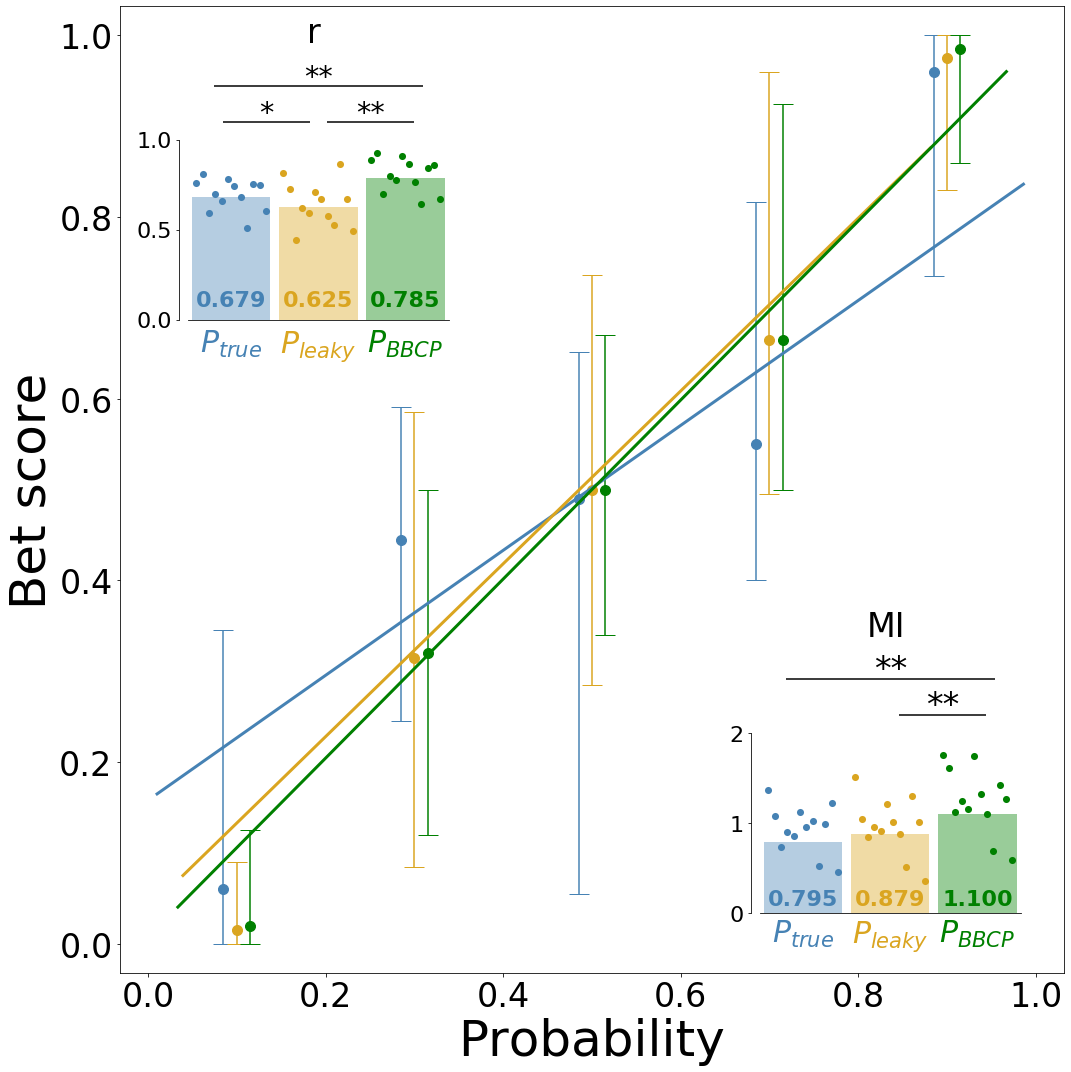

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(fig_width_f, fig_width_f))#,constrained_layout=True)
axs = e.comparison_line(ax=axs, fig=fig, result='bet', offset=0.015, lw_r=3, pause=False,  **opt)

real :
mean r : 0.6138094371436248 +/- 0.06988338061265736
mean MI : 0.5622221741547854 +/- 0.10792628505105299

leaky :
mean r : 0.5480415128060833 +/- 0.07497000573998394
mean MI : 0.5777247401518514 +/- 0.09612469755078588

mean :
mean r : 0.6678297468019966 +/- 0.07826331022185087
mean MI : 0.7123041237807923 +/- 0.12506403044256426

real leaky
r = WilcoxonResult(statistic=11.0, pvalue=0.0280561241492436)
mi = WilcoxonResult(statistic=37.0, pvalue=0.875329249147922) 

real mean
r = WilcoxonResult(statistic=1.0, pvalue=0.0028734139278525227)
mi = WilcoxonResult(statistic=0.0, pvalue=0.002217721464237049) 

leaky mean
r = WilcoxonResult(statistic=2.0, pvalue=0.0037017494066892425)
mi = WilcoxonResult(statistic=2.0, pvalue=0.0037017494066892425) 



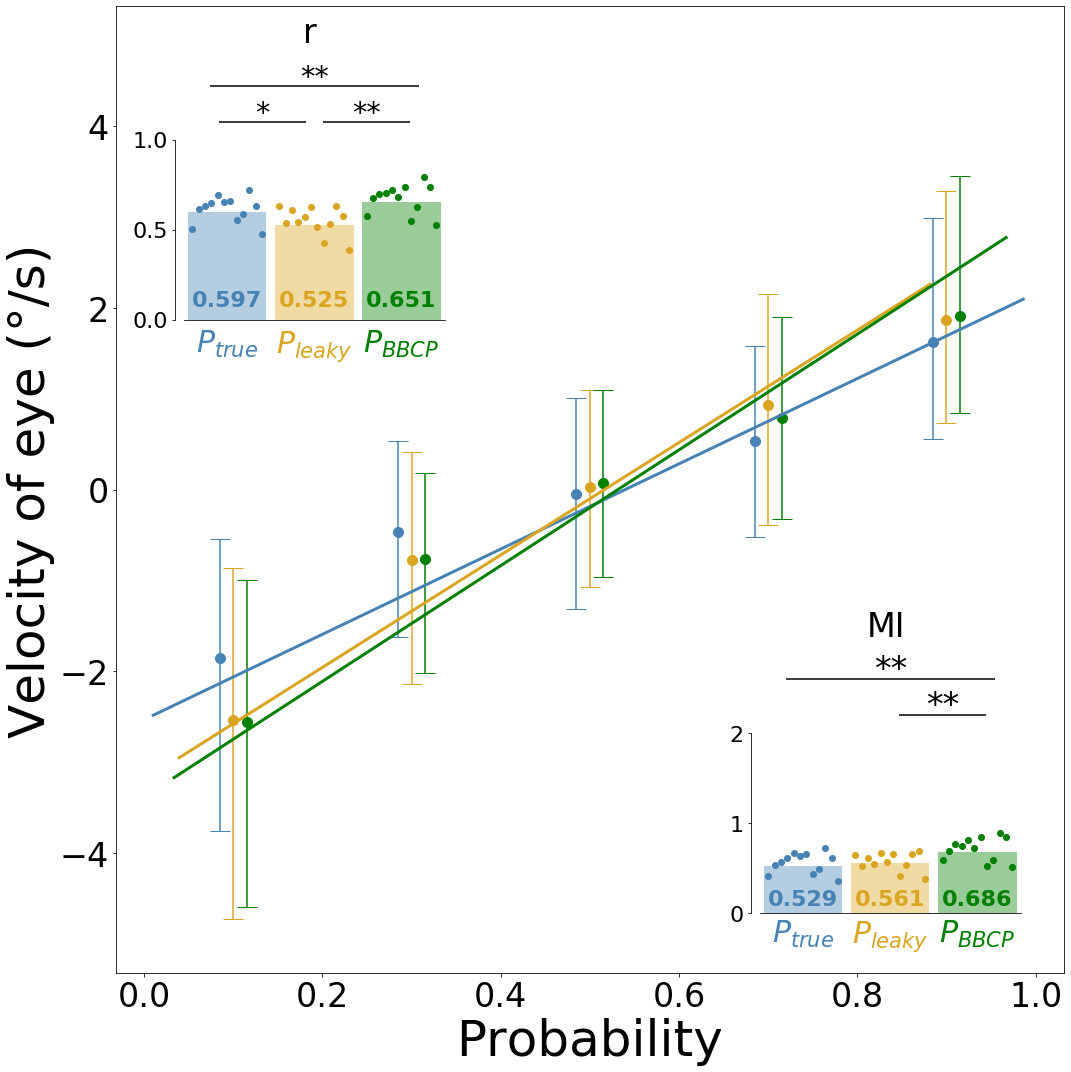

In [10]:
fig, axs = plt.subplots(1, 1, figsize=(fig_width_f, fig_width_f))#,constrained_layout=True)
axs = e.comparison_line(ax=axs, fig=fig, result='velocity', offset=0.015, lw_r=3, pause=False,  **opt)

## two representative subjects

In [11]:
N_trials = 200
num_block = 0
#sujet = [0,1,2,3,4,5,6,7, 8,9, 10, 11]
sujet = [10, 6]
figname = '2_results_enregistrement'

In [12]:
t_label_f = t_label
fig_width_f = fig_width

In [13]:
color=[['k', 'k'], [color_true_p, color_true_p], ['k','none']]
alpha = [[.35,.15],[.0,.0],[1,0]]
opt = dict(sujet=sujet, num_block=[num_block], TD=True, legends=True,
           color=color,alpha=alpha, titre='', t_label=t_label_f, lw=4,
           color_bet='firebrick', color_va='dimgrey', fig_width=fig_width_f) 

sujet 10 = TN
sujet 6 = LB


/Users/laurentperrinet/pool/AME_is_AnalyseModelisationExperimentation_Chloe/AnticipatorySPEM/aSPEM.py:1729: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  try: fig.tight_layout()


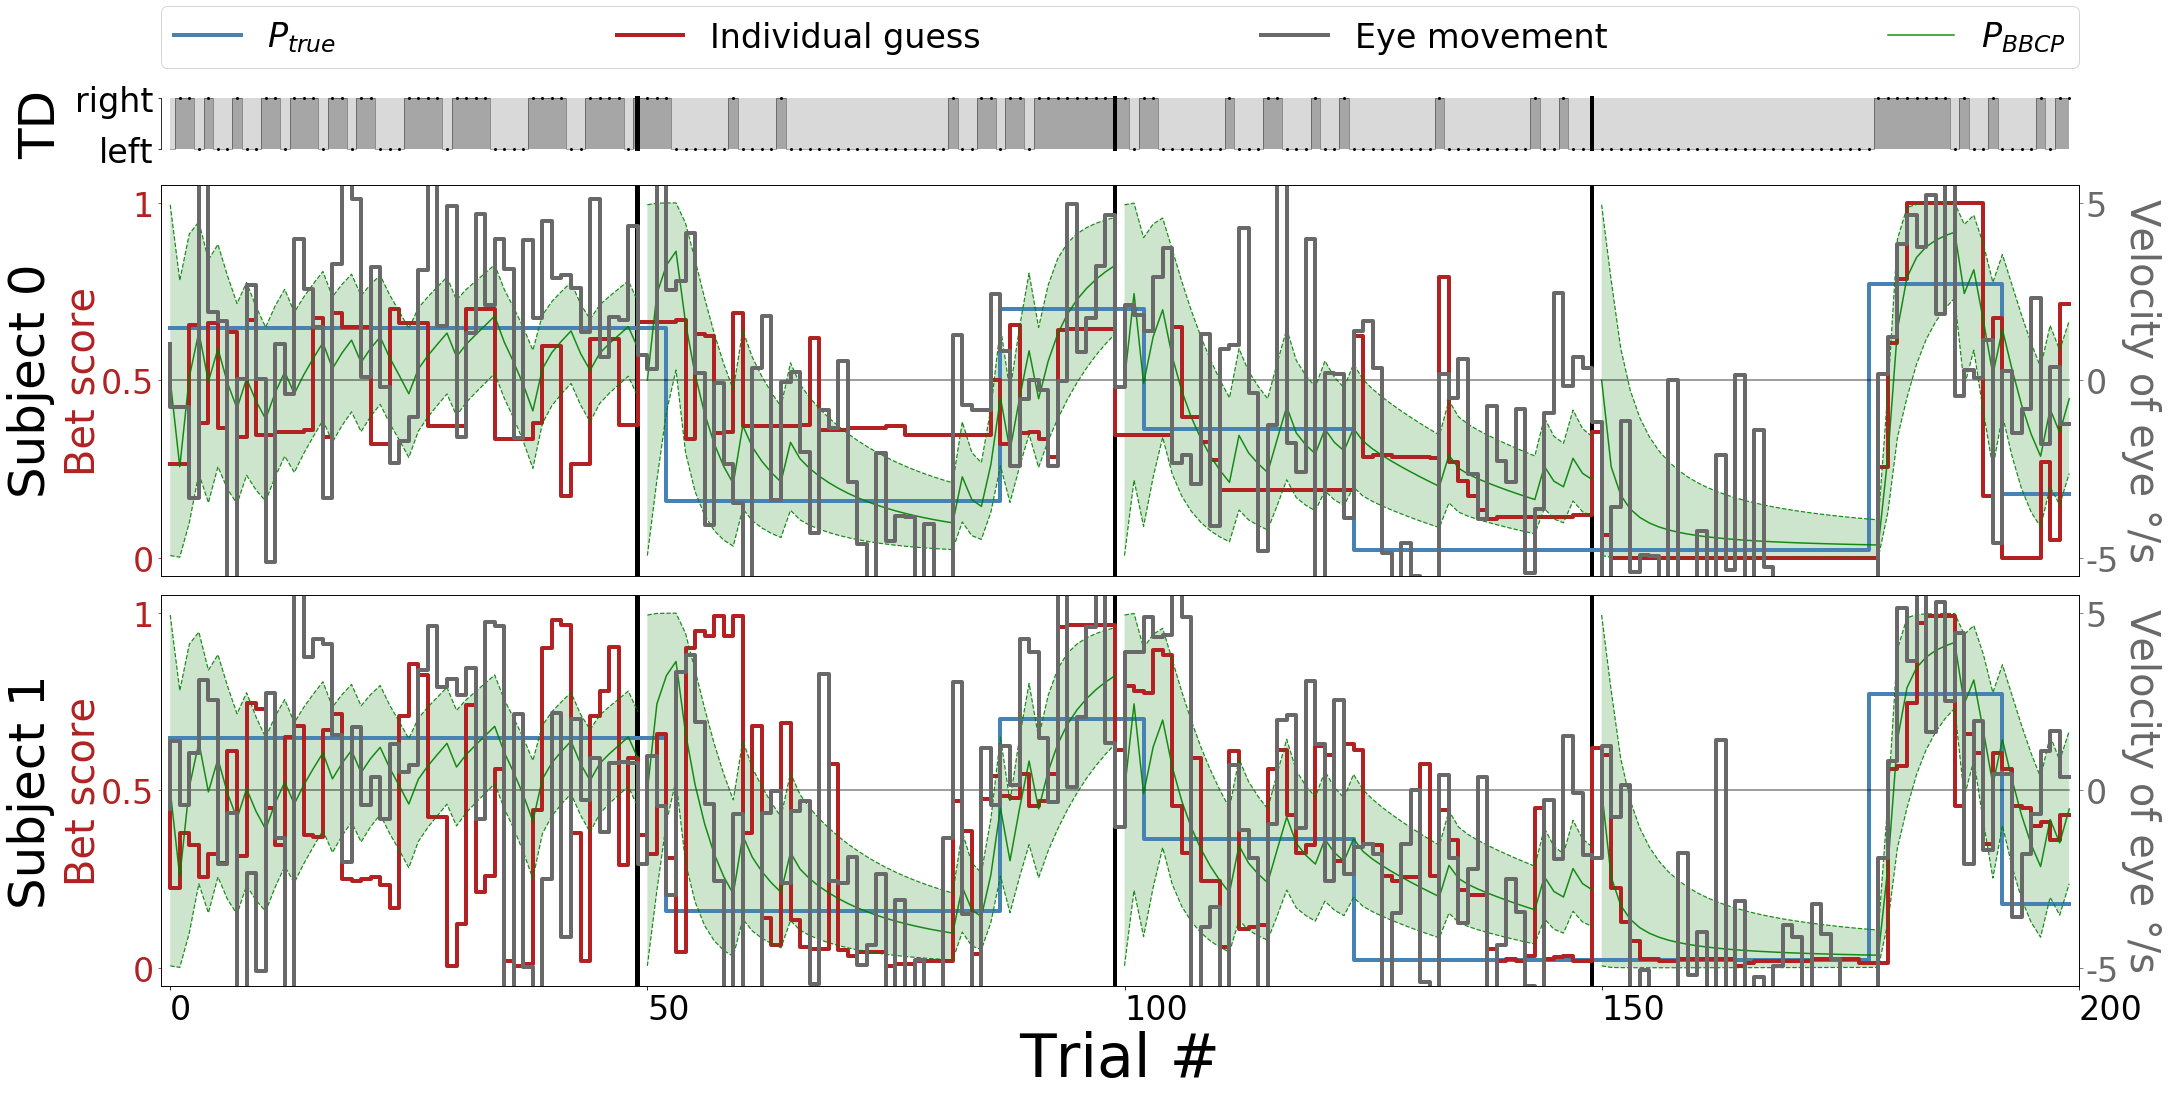

In [14]:
fig, axs = e.plot_experiment(mode='deux', mode_bcp='mean', color_bcp=color_bcp_mean, print_suj=True, **opt)
for ext in exts: fig.savefig('{msfigpath}/{figname}'.format(msfigpath=msfigpath, figname=figname) + ext, dpi=400, bbox_inches='tight', pad_inches=0)